In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',25)

In [2]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [6]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [7]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [8]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [9]:
df.drop('customerID',axis=1,inplace=True)

In [10]:
columns =set(df.columns)-{'SeniorCitizen','tenure','MonthlyCharges','TotalCharges'}
columns=list(columns)

In [11]:
columns

['StreamingTV',
 'PaymentMethod',
 'InternetService',
 'MultipleLines',
 'Contract',
 'OnlineSecurity',
 'Partner',
 'PhoneService',
 'PaperlessBilling',
 'OnlineBackup',
 'Churn',
 'Dependents',
 'TechSupport',
 'StreamingMovies',
 'gender',
 'DeviceProtection']

In [12]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan).astype('float')

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df2=df.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
for i in columns:
    df2[i]=encoder.fit_transform(df2[i])

In [16]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [17]:
df2['TotalCharges'].mean()

2283.3004408418697

In [18]:
df2['TotalCharges']=df2['TotalCharges'].fillna(df2['TotalCharges'].median())

In [19]:
df3=df2.copy()

<AxesSubplot:>

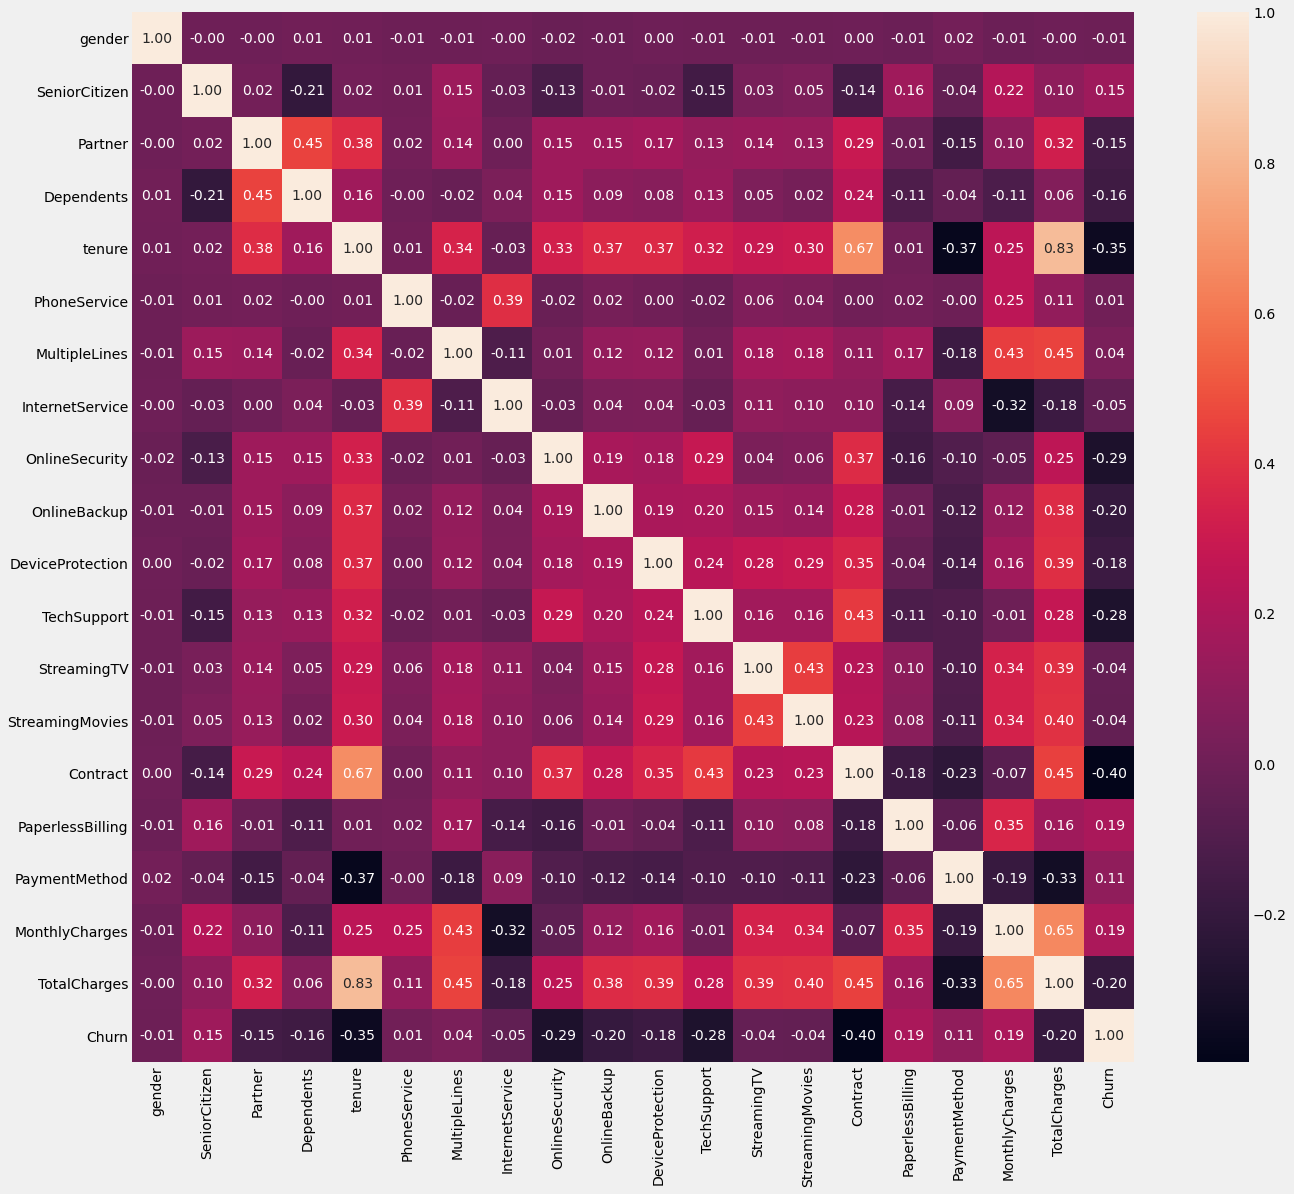

In [20]:
plt.figure(figsize=(20,18))
sns.heatmap(df3.corr(),annot=True,fmt=".2f")

In [21]:
from sklearn.preprocessing import PowerTransformer
minmax_sclaer =PowerTransformer()
df3['tenure']=minmax_sclaer.fit_transform(df3[['tenure']])
df3['MonthlyCharges']=minmax_sclaer.fit_transform(df3[['MonthlyCharges']])
df3['TotalCharges']=minmax_sclaer.fit_transform(df3[['TotalCharges']])

In [22]:
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.644343,0,1,0,0,2,0,0,0,0,0,1,2,-1.158541,-1.811104,0
1,1,0,0,0,0.297205,1,0,0,2,0,2,0,0,0,1,0,3,-0.239492,0.254277,0
2,1,0,0,0,-1.495444,1,0,0,2,2,0,0,0,0,0,1,3,-0.342665,-1.387090,1
3,1,0,0,0,0.646327,0,1,0,2,0,2,2,0,0,1,0,0,-0.731079,0.233221,0
4,0,0,0,0,-1.495444,1,0,1,0,0,0,0,0,0,0,1,2,0.213545,-1.249770,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.078084,1,2,0,2,0,2,2,2,2,1,1,3,0.671510,0.296643,0
7039,0,0,1,1,1.342198,1,2,1,0,2,2,0,2,2,1,1,1,1.260981,1.567315,0
7040,0,0,1,1,-0.725121,0,1,0,2,0,0,0,0,0,0,1,2,-1.167241,-0.859191,0
7041,1,1,1,0,-1.265130,1,2,1,0,0,0,0,0,0,0,1,3,0.334312,-0.922307,1


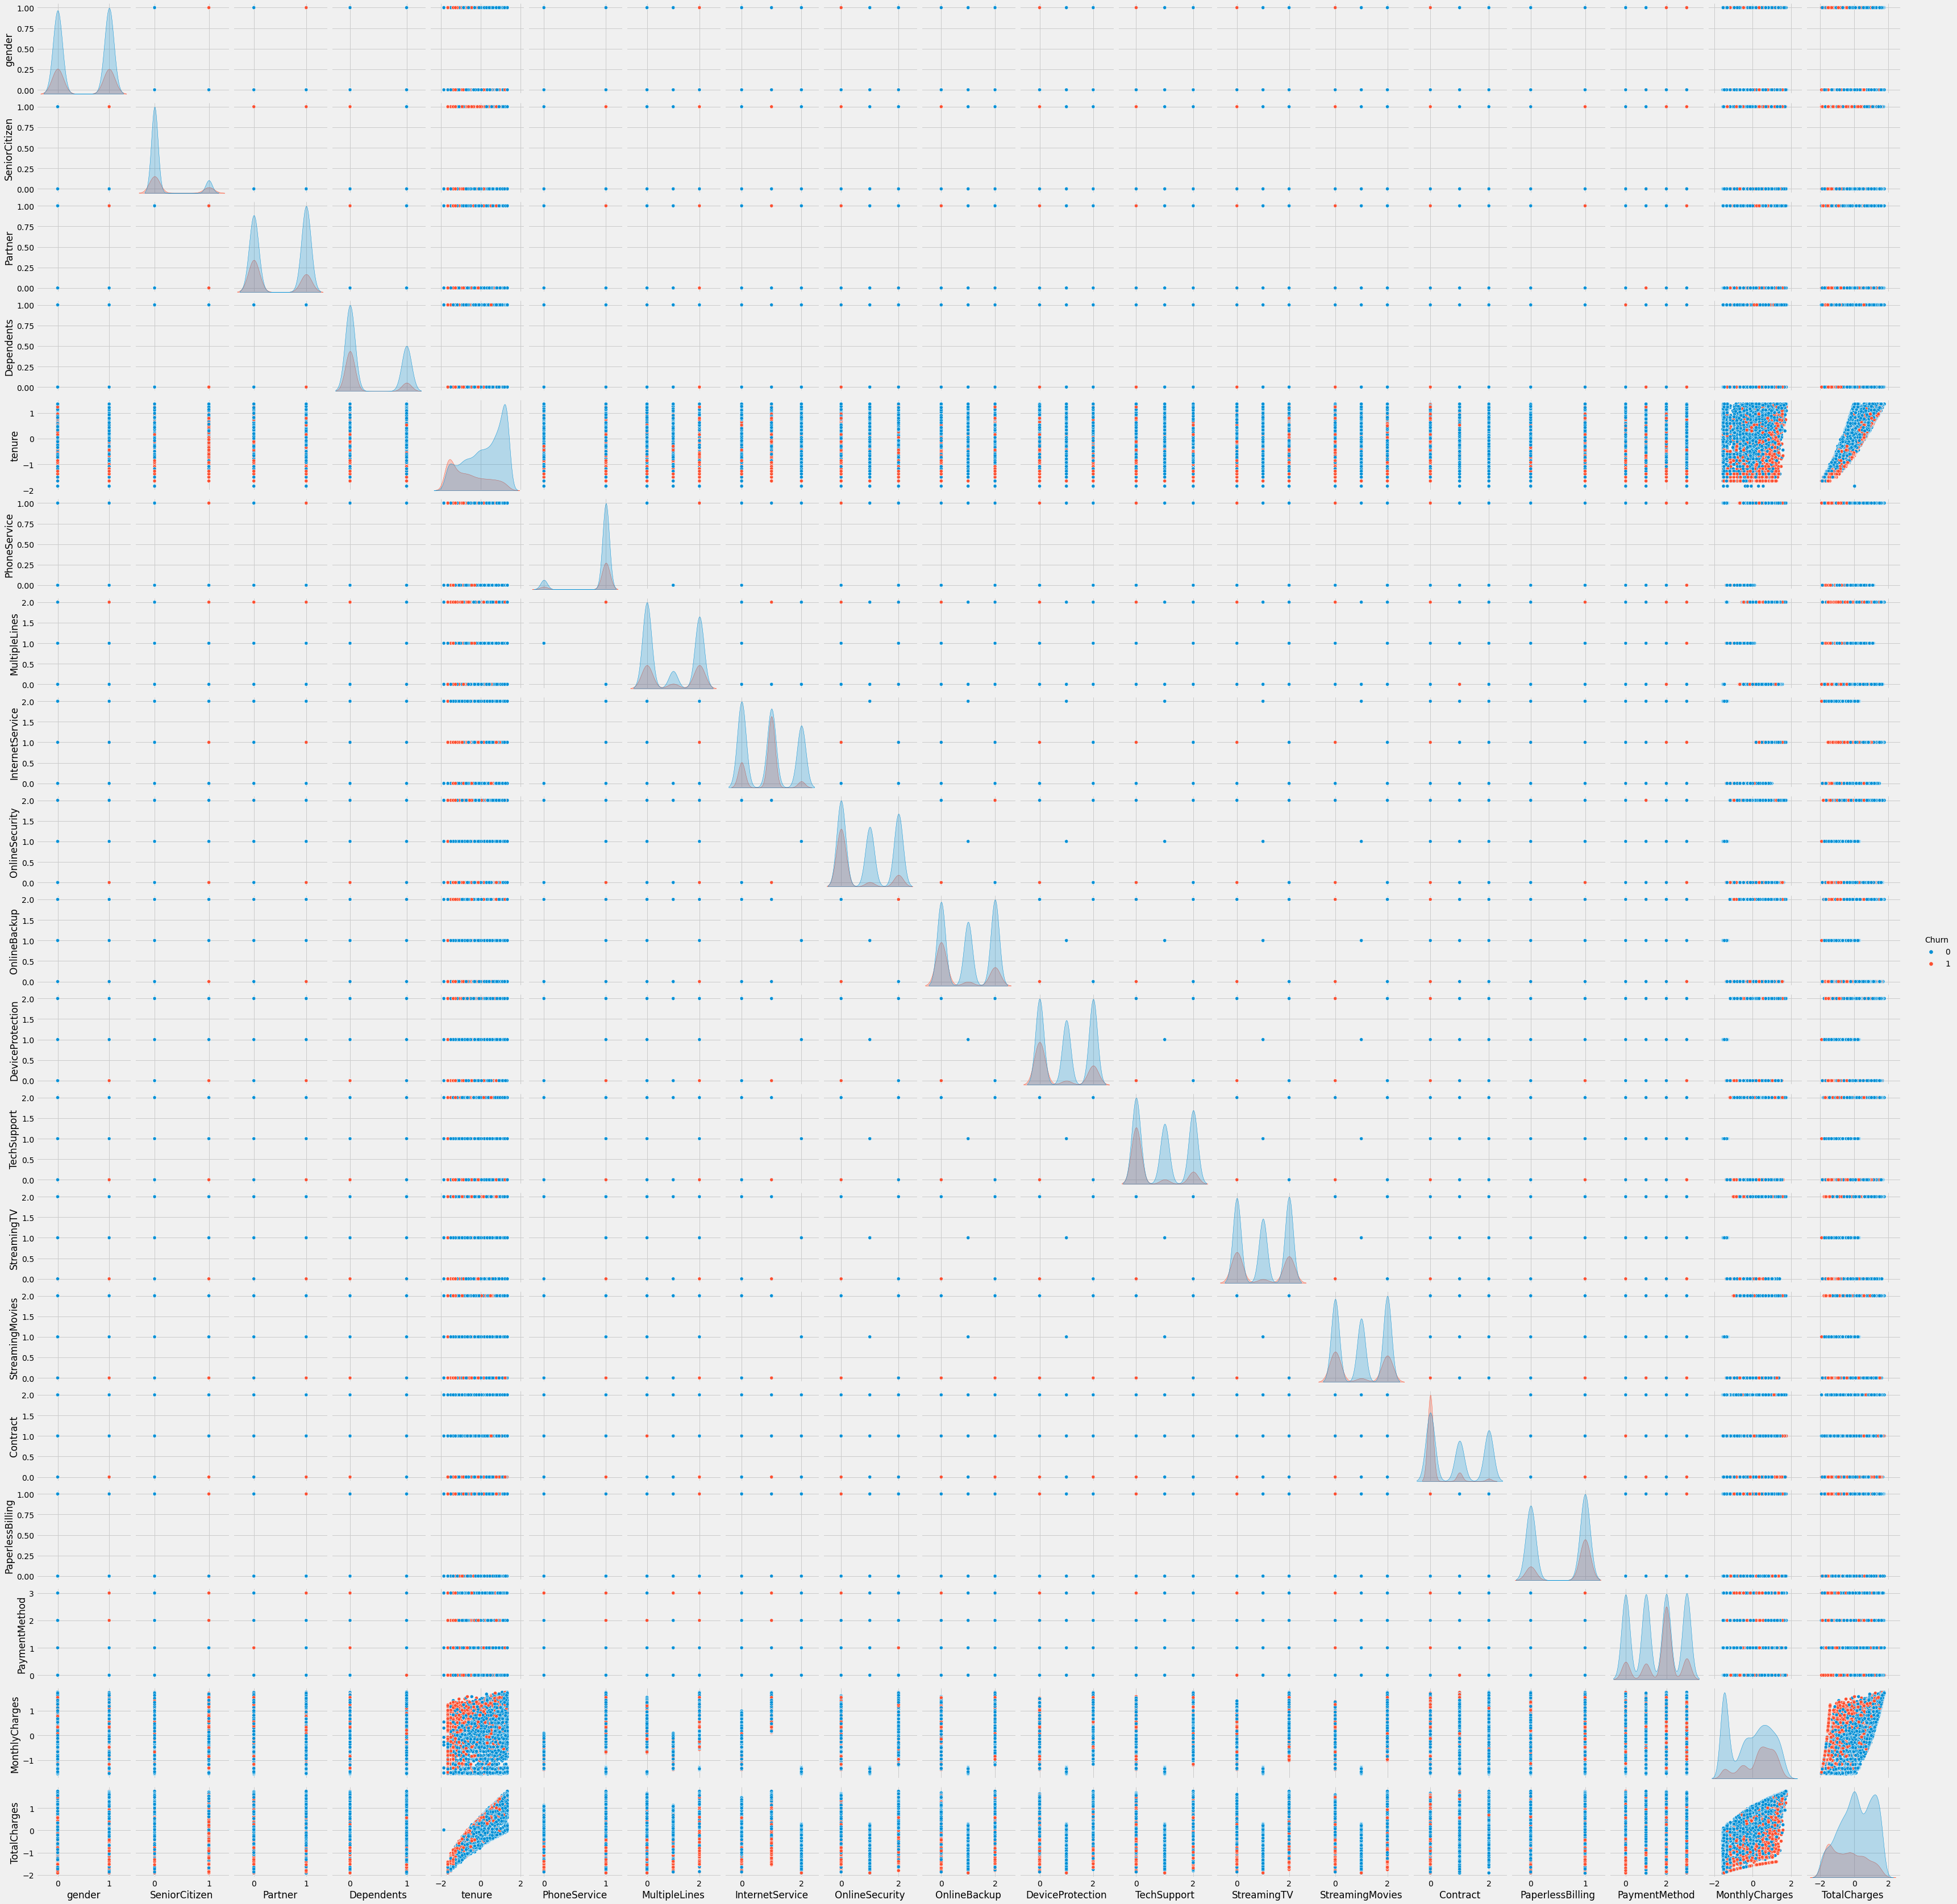

In [23]:
sns.pairplot(df3,hue='Churn')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

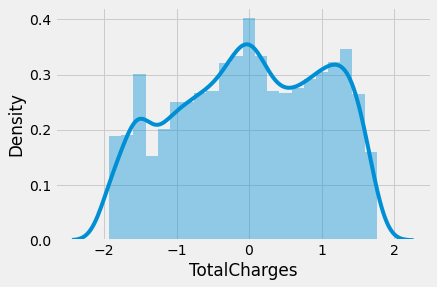

In [24]:
sns.distplot(df3['TotalCharges'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

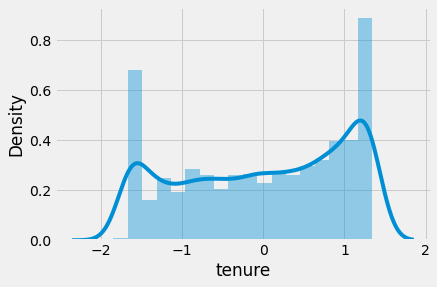

In [25]:
sns.distplot(df3['tenure'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

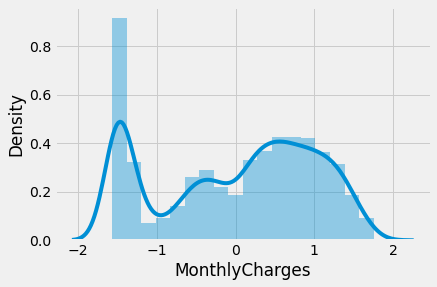

In [26]:
sns.distplot(df3['MonthlyCharges'])

In [27]:
X=df3.drop('Churn',axis=1)
y=df3['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

# Logestic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logestic_regression_model =LogisticRegression()
logestic_regression_model.fit(X_train,y_train)
y_pred =logestic_regression_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8225691980127751

In [58]:
from sklearn.model_selection import cross_val_score,KFold

kfold =KFold(n_splits=10)
loegstic_Regression= cross_val_score(LogisticRegression(C= 100, penalty= 'l2', solver= 'lbfgs'),X,y,cv=kfold,scoring='roc_auc',error_score='raise')
loegstic_Regression.mean()

0.8482999709734171

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [500,300,200,100]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847891 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847887 (0.013549) with: {'C': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847882 (0.013547) with: {'C': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847889 (0.013549) with: {'C': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.847888 (0.013551) with: {'C': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847885 (0.013547) with: {'C': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847890 (0.013550) with: {'C': 300, 'penalty': 'l2', 'solver': 'liblinear'}
0.847890 (0.013551) with: {'C': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847883 (0.013545) with: {'C': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847889 (0.013551) with: {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
0.847891 (0.013552) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.847890 (0.013552) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.847887 (0.013546) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [32]:
grid_search.best_score_

0.8478911036270126

# RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model =RandomForestClassifier()
random_forest_model.fit(X_train,y_train)
y_pred =random_forest_model.predict(X_test)
print('accuracy...',accuracy_score(y_test,y_pred))

accuracy... 0.8041163946061036


In [68]:
from sklearn.model_selection import cross_val_score,KFold

kfold =KFold(n_splits=10)
rf_score= cross_val_score(RandomForestClassifier(),X,y,cv=kfold,scoring='roc_auc',error_score='raise')
rf_score.mean()

0.8250179560888556

# ADAboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,KFold

kfold =KFold(n_splits=15)
adaboost= cross_val_score(AdaBoostClassifier(),X,y,cv=kfold,scoring='roc_auc_ovo',error_score='raise')

In [46]:
adaboost.mean()

0.8459032035427616

# Gradient Boost

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,KFold

kfold =KFold(n_splits=10)
gradient_boost= cross_val_score(GradientBoostingClassifier(),X,y,cv=kfold,scoring='roc_auc',error_score='raise')
gradient_boost.mean()

0.8471900944510973

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold

kfold =KFold(n_splits=10)
knn= cross_val_score(KNeighborsClassifier(n_neighbors=100),X,y,cv=kfold,scoring='roc_auc_ovo',error_score='raise')
knn.mean()

0.833909811210327

# Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold

kfold =KFold(n_splits=20)
naive_bayes= cross_val_score(GaussianNB(),X,y,cv=kfold,scoring='roc_auc',error_score='raise')
naive_bayes.mean()

0.8300782628837767

In [70]:
model_comparision=pd.DataFrame({
    'Model': ['Logistic Regression','K-Nearest Neighbor', 'Gradient Boost',
                 'Random Forest','ADAboost','Naive Bayes'],
    'Score':[loegstic_Regression.mean(), knn.mean(), gradient_boost.mean(), 
              rf_score.mean(), adaboost.mean(),naive_bayes.mean()]})

In [71]:
model_comparision=model_comparision.sort_values(by="Score",ascending=False)
model_comparision =model_comparision.set_index('Score')
model_comparision.reset_index()

,Score,Model
0,0.848300,Logistic Regression
1,0.847190,Gradient Boost
2,0.845903,ADAboost
3,0.833910,K-Nearest Neighbor
4,0.830078,Naive Bayes
5,0.825018,Random Forest
